In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

C:\Users\shirt\AppData\Local\Temp\ipykernel_17864\2858935832.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


In [3]:
data['event_time'] = pd.to_datetime(data['event_time'])

## Q1

In [4]:

data['duration_to_next_event'] = data.groupby(['user_session','user_id']).event_time.diff().dt.total_seconds()
data['duration_to_next_event'] = data.groupby(['user_session','user_id'])['duration_to_next_event'].shift(-1)
data['duration_to_next_event'] = data.duration_to_next_event.fillna(0)


In [17]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0,1,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0,1,1
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0,1,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0,1,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,2
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0,1,3
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0,1,1
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0,1,1


## Q2

In [18]:
data.sort_values(by=['user_id','event_time'],inplace=True)
data['days_since_last_visit'] = data.groupby('user_id')['event_time'].diff().dt.days
data['funnel_number'] = np.where(data['days_since_last_visit'].fillna(0)> 5 ,1,0)
data['funnel_number'] = data.groupby('user_id')['funnel_number'].cumsum()+1
data.drop('days_since_last_visit' , axis=1 , inplace =True)
data                


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1,3
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1,4
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1,5
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1


## Q3

In [6]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount()+1
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0,1,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0,1,1
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0,1,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0,1,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,2
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0,1,3
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0,1,1
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0,1,1


## Q4

In [19]:
price_pattern = r'\d+\.\d+' #מספר.מספר
#נחפש מספר בכל שורה בעמודת המחיר , ניקח את המספר הראשון שנמצא ואותו נשים כערך בעמודת המחיר
data['price'] = data['price'].apply(lambda x: float(re.findall(price_pattern, str(x))[0]))

In [20]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'duration_to_next_event', 'funnel_number', 'index_in_funnel'],
      dtype='object')

## Q5

<AxesSubplot:xlabel='event_type', ylabel='count'>

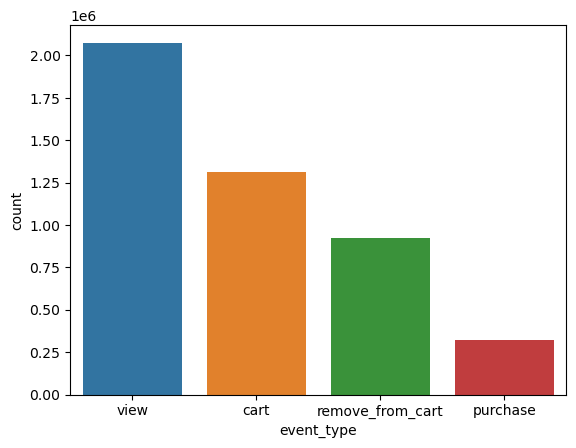

In [21]:
sns.countplot(x='event_type', data=data)

## Q6

In [32]:
session_data = data.copy()
session_data = session_data.reindex(columns=['user_session','user_id','event_time','event_type','product_id','funnel_number','index_in_funnel','duration_to_next_event'])
session_data = session_data.drop_duplicates(subset='user_session') #מאחד כפילויות
session_data = session_data.reset_index() 
session_data.drop('index',axis=1,inplace=True)


In [33]:
session_data['total_events'] = data.groupby(['user_id','user_session'])['event_time'].cumcount()+1
session_data['total_web_time'] = data.groupby(['user_id','user_session'])['duration_to_next_event'].cumsum()

In [34]:
view_list = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_viewed'] = session_data['user_session'].map(view_list)

In [35]:
cart_list = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_added_to_cart'] = session_data['user_session'].map(cart_list)


In [36]:
purchase_list = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].agg(list)
session_data['list_of_purchased'] = session_data['user_session'].map(purchase_list)


In [37]:
session_data = session_data.drop(columns=['event_type','product_id','duration_to_next_event','event_time'])

In [38]:
session_data

,user_session,user_id,funnel_number,index_in_funnel,total_events,total_web_time,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,d0484d94-7ac1-44e8-a310-2360da11ad9d,1120748,1,1,1,23.0,[5240],NaN,NaN
1,b16644a2-44db-4650-8156-f6f03782d432,1458813,1,1,1,15.0,[5711145],NaN,NaN
2,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1458813,1,2,1,45.0,[5814066],NaN,NaN
3,921ff98c-a419-4132-af94-ee26880334b0,1458813,1,3,1,103.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",NaN,NaN
4,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1458813,1,31,2,15.0,[5711087],NaN,NaN
...,...,...,...,...,...,...,...,...,...
942018,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,579967088,1,1,127,449.0,[5881428],NaN,NaN
942019,547ad51a-cdf2-4a0a-b819-8061c012bcee,579968012,1,1,6,128.0,[5873630],NaN,NaN
942020,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,579968623,1,1,128,449.0,"[5892179, 5886282, 5892179, 5900651, 5892179]",NaN,NaN
942021,878af093-7570-48ae-966c-d50ce61e390c,579968937,1,1,129,449.0,[5790563],NaN,NaN


In [44]:
session_data[(session_data['user_id'] == 579967088)]

,user_session,user_id,funnel_number,index_in_funnel,total_events,total_web_time,list_of_viewed,list_of_added_to_cart,list_of_purchased
942018,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,579967088,1,1,127,449.0,[5881428],NaN,NaN


In [47]:
#print(session_data.list_of_added_to_cart.isnull().sum())

729161
